# Support Vector Classifier - Iris Dataset
[Source]
***

# Importing necessary libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load the data

In [4]:
iris = load_iris()
X, y = iris.data, iris.target

# Preprocessing

In [5]:
# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [28]:
# Function to visualize the decision boundaries for the classifer
def visualize_decision_boundary(clf, kernel):
    # Create a grid for decision boundary visualization
    x_min, x_max = X_pca[:, 0].min() - 0.1, X_pca[:, 0].max() + 0.1
    y_min, y_max = X_pca[:, 1].min() - 0.1, X_pca[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Predict over the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundaries
    plt.figure(figsize=(20, 5))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1", s=50)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
    plt.title(f"SVM Decision Boundary (kernel = {kernel})")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title='Classes', loc='best')
    plt.show()

# Model

In [7]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [31]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

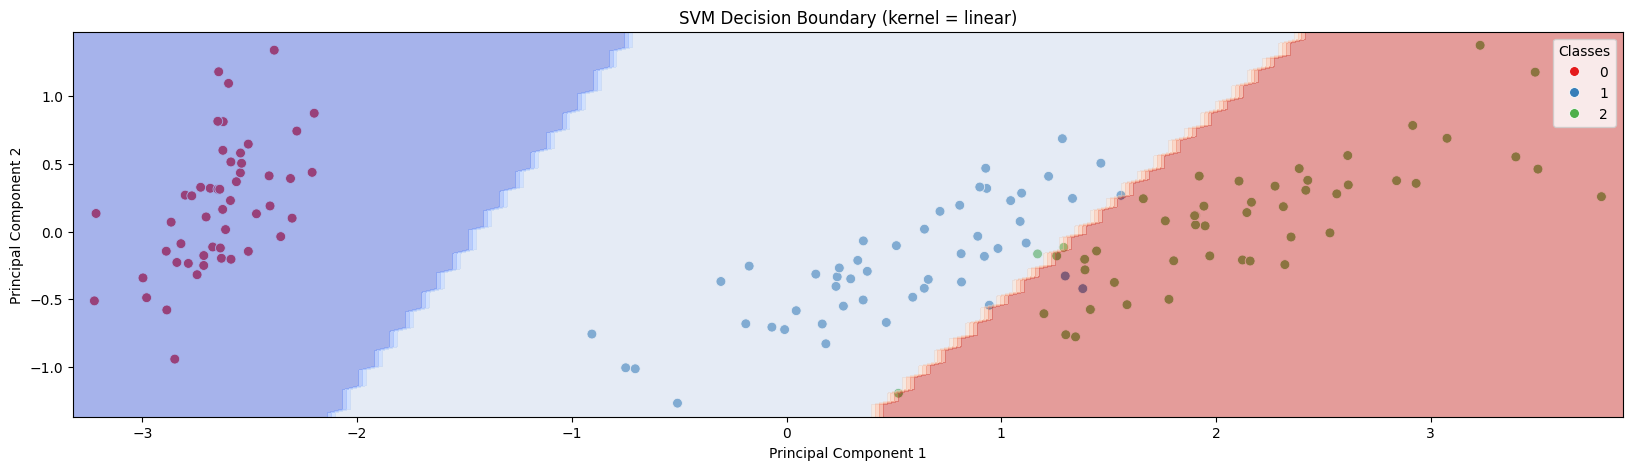

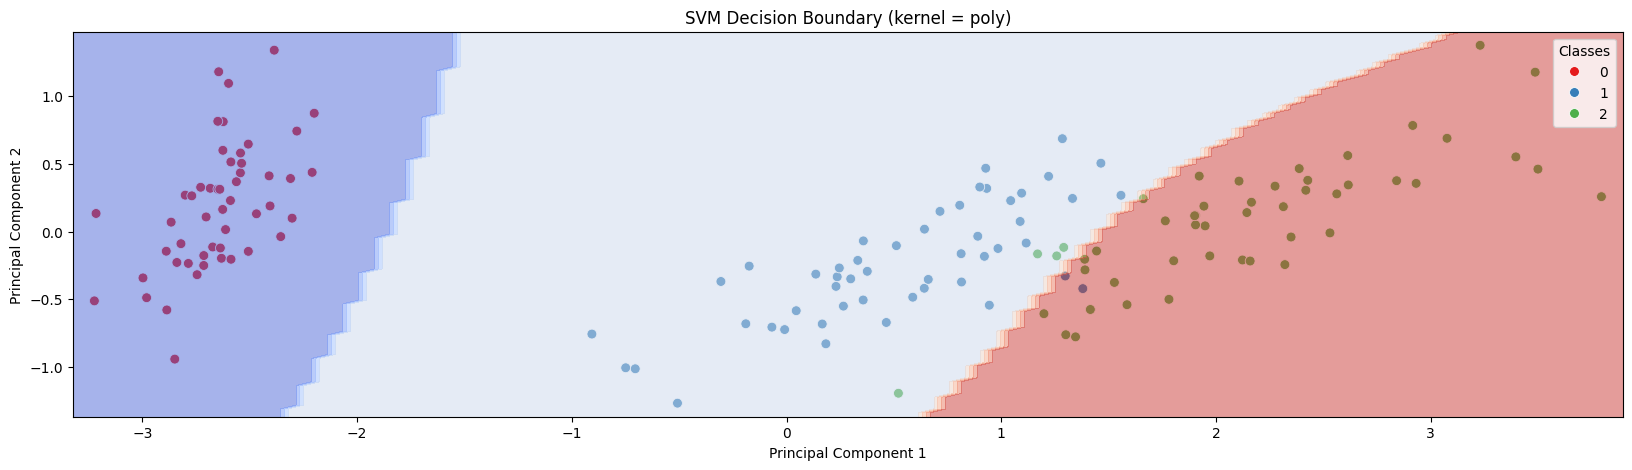

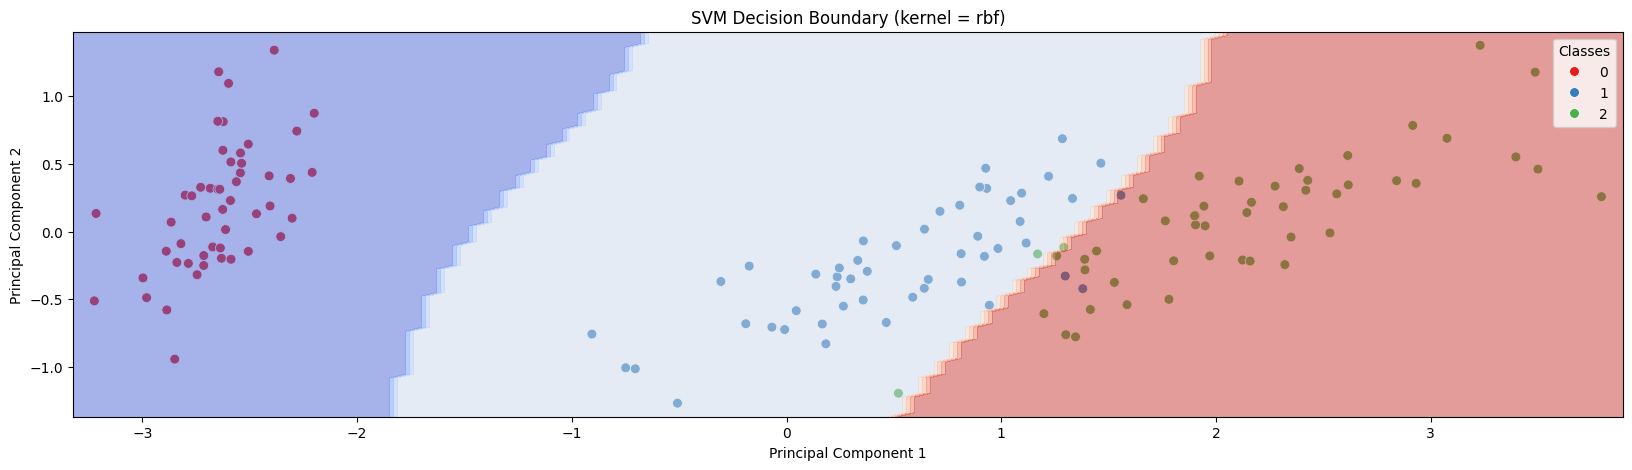

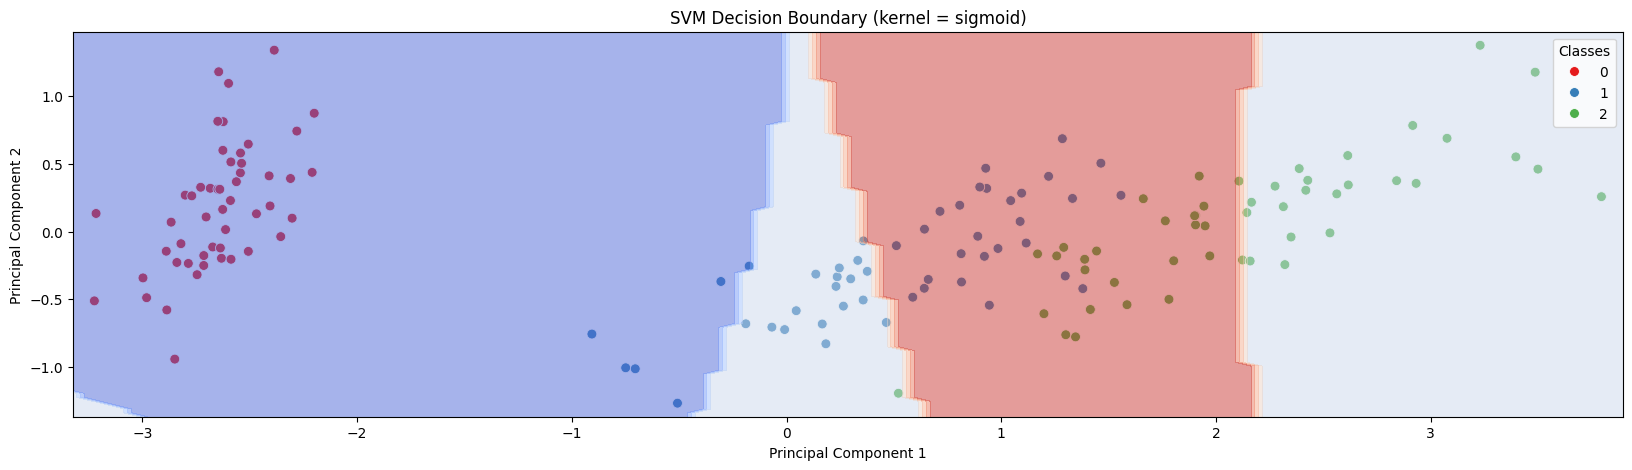

In [48]:
scores = pd.DataFrame(columns=kernels, index=['Score'])
for kernel in kernels:
    # Train the SVM model
    clf = SVC(kernel=kernel, C=1, gamma=0.5)  # RBF kernel for non-linear separation
    clf.fit(X_train, y_train);
    visualize_decision_boundary(clf, kernel)
    scores[kernel] = clf.score(X_test, y_test)

In [49]:
scores

,linear,poly,rbf,sigmoid
Score,0.966667,0.966667,1.0,0.6


# Summary
***

The `rbf` kernel performs best when it comes to classifying different Iris species.

**End**